In [146]:
from numpy import *
from sklearn.discriminant_analysis import *
from sklearn.metrics import *
from sklearn.model_selection import *

In [147]:
#dataset='wine'
dataset='hepatitis'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0];x=delete(x,0,1)
# preprocessing: mean 0, desviation 1
x=(x-mean(x,0))/std(x,0)
print('LDA dataset %s:'%dataset)

LDA dataset hepatitis:


### training and test on the whole dataset

In [148]:
lda=LinearDiscriminantAnalysis().fit(x,y)
z=lda.predict(x)
kappa=cohen_kappa_score(y,z);acc=accuracy_score(y,z)
print('Train+Test: kappa=%.1f%% accuracy=%.1f%%'\
%(100*kappa,100*acc))
cf=confusion_matrix(y,z)
print('confusion matrix:'); print(cf)

Train+Test: kappa=62.8% accuracy=88.4%
confusion matrix:
[[ 21  11]
 [  7 116]]


###  4-fold cross-validation using cross_val_predict sklearn function

In [149]:
lda=LinearDiscriminantAnalysis()
K=4
z=cross_val_predict(lda,x,y,cv=K)
kappa=cohen_kappa_score(y,z)
acc=accuracy_score(y,z)
print('%i-fold CV: kappa=%.1f%% accuracy=%.1f%%'\
%(K,100*kappa,100*acc))
cf=confusion_matrix(y,z)
print('confusion matrix:'); print(cf)
C=len(unique(y))
if C==2:
  pre=precision_score(y,z)
  re=recall_score(y,z)
  f1=f1_score(y,z)
  print('precision=%.1f%% recall=%.1f%% f1=%.1f%%'\
  %(100*pre,100*re,100*f1))

4-fold CV: kappa=43.5% accuracy=80.6%
confusion matrix:
[[ 19  13]
 [ 17 106]]
precision=52.8% recall=59.4% f1=55.9%


In [150]:
from numpy import *
from sklearn.discriminant_analysis import *
from sklearn.metrics import *
from sys import exit

In [151]:
dataset='wine'
#dataset='hepatitis'
nf='data/lab4/%s.data'%dataset;x=loadtxt(nf)
y=x[:,0]-1;x=delete(x,0,1);C=len(unique(y))
print('LDA dataset %s'%dataset)

def createFolds(x,y,K):
  from numpy.random import shuffle,seed
  seed(100)
  [N,n]=x.shape;C=len(unique(y))
  ntf=K-2
  nvf=1
  ti=[[]]*K
  vi=[[]]*K
  si=[[]]*K
  for i in range(C):
    t=where(y==i)[0]
    npc=len(t)
    shuffle(t)
    npf=int(npc/K)
    ntp=npf*ntf
    nvp=npf*nvf
    nsp=npc-ntp-nvp
    start=0
    for k in range(K):
      p=start
      u=[]
      for l in range(ntp):
        u.append(t[p])
        p=(p+1)%npc
      ti[k]=ti[k]+u
      u=[]
      for l in range(nvp):
        u.append(t[p])
        p=(p+1)%npc
      vi[k]=vi[k]+u
      u=[]
      for l in range(nsp):
        u.append(t[p])
        p=(p+1)%npc
      si[k]=si[k]+u
      start=start+npf

  tx=[];ty=[];vx=[];vy=[];sx=[];sy=[]
  for k in range(K):
    i=ti[k];tx.append(x[i,:])
    ty.append(y[i])
    i=vi[k];vx.append(x[i,:])
    vy.append(y[i])
    i=si[k];sx.append(x[i,:])
    sy.append(y[i])
  return [tx,ty,vx,vy,sx,sy]

K=4
tx,ty,vx,vy,sx,sy=createFolds(x,y,K)

# preprocessing: mean 0, deviation 1
for k in range(K):
  med=mean(tx[k],0);dev=std(tx[k],0)
  tx[k]=(tx[k]-med)/dev
  vx[k]=(vx[k]-med)/dev
  sx[k]=(sx[k]-med)/dev
kappa=zeros(K);acc=zeros(K);cm=zeros([C,C])
print('%10s %10s %10s'%('k','kappa(%)','acc(%)'),end='')
if C==2:
  pre=zeros(K);re=zeros(K);f1=zeros(K)
  print('%15s %10s %10s'%('Precision(%)','Recall(%)','F1(%)'),end='')
print('')
for k in range(K):
  x=vstack((tx[k],vx[k]));y=concatenate((ty[k],vy[k]))
  modelo=LinearDiscriminantAnalysis().fit(x,y)
  z=modelo.predict(sx[k]);y=sy[k]
  kappa[k]=100*cohen_kappa_score(y,z)
  acc[k]=100*accuracy_score(y,z)
  cm+=confusion_matrix(y,z)
  print('%10i %10.2f %10.2f'%(k+1,kappa[k],acc[k]),end='')
  if C==2:
    pre[k]=100*precision_score(y,z)
    re[k]=100*recall_score(y,z)
    f1[k]=100*f1_score(y,z)
    print('%15.2f %10.2f %10.2f'%(pre[k],re[k],f1[k]),end='')
  print('')
kappa_mean=mean(kappa);acc_mean=mean(acc);cm/=K
print('kappa_mean=%.2f%% acc_mean=%.2f%%'%(kappa_mean,acc_mean),end='')
if C==2:
  pre_mean=mean(pre);re_mean=mean(re);f1_mean=mean(f1)
  print('precision_mean=%.2f%% recall_mean=%.2f%%\
  F1_mean=%.2f%%'%(pre_mean,re_mean,f1_mean))
else:
  print('')

LDA dataset wine
         k   kappa(%)     acc(%)
         1     100.00     100.00
         2     100.00     100.00
         3     100.00     100.00
         4      96.88      97.96
kappa_mean=99.22% acc_mean=99.49%


###  Calculate the accuracy, Cohen kappa and confusion matrix for both datasets using the LDA classifier using the whole dataset as training and test set.

In [152]:
lda = LinearDiscriminantAnalysis()

# hepatitis
dataset='hepatitis'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0]
x=delete(x,0,1)
# preprocessing: mean 0, desviation 1
x=(x-mean(x,0))/std(x,0)
lda.fit(x, y)
z=lda.predict(x)
kappa=cohen_kappa_score(y,z);acc=accuracy_score(y,z)
print('hepatitis:')
print('Train+Test: kappa=%.1f%% accuracy=%.1f%%'\
%(100*kappa,100*acc))
cf=confusion_matrix(y,z)
print('confusion matrix:'); 
print(cf, '\n')

# wine
dataset = 'wine'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0];x=delete(x,0,1)
# preprocessing: mean 0, desviation 1
x=(x-mean(x,0))/std(x,0)
lda.fit(x, y)
z=lda.predict(x)
kappa=cohen_kappa_score(y,z);acc=accuracy_score(y,z)
print('wine:')
print('Train+Test: kappa=%.1f%% accuracy=%.1f%%'\
%(100*kappa,100*acc))
cf=confusion_matrix(y,z)
print('confusion matrix:'); print(cf)

hepatitis:
Train+Test: kappa=62.8% accuracy=88.4%
confusion matrix:
[[ 21  11]
 [  7 116]] 

wine:
Train+Test: kappa=100.0% accuracy=100.0%
confusion matrix:
[[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]


### Repeat the process using cross-validation with 4 folds.

In [153]:
lda=LinearDiscriminantAnalysis()
K=4

# hepatitis
dataset='hepatitis'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0]
x=delete(x,0,1)
# preprocessing: mean 0, desviation 1
x=(x-mean(x,0))/std(x,0)
z=cross_val_predict(lda,x,y,cv=K)
kappa=cohen_kappa_score(y,z);acc=accuracy_score(y,z)
print(f'{dataset}:')
print('%i-fold CV: kappa=%.1f%% accuracy=%.1f%%'\
%(K,100*kappa,100*acc))
cf=confusion_matrix(y,z)
print('confusion matrix:'); print(cf)
C=len(unique(y))
if C==2:
  pre=precision_score(y,z)
  re=recall_score(y,z)
  f1=f1_score(y,z)
  print('precision=%.1f%% recall=%.1f%% f1=%.1f%%'%(100*pre,100*re,100*f1), '\n')

# wine
dataset='wine'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0]
x=delete(x,0,1)
# preprocessing: mean 0, desviation 1
x=(x-mean(x,0))/std(x,0)
z=cross_val_predict(lda,x,y,cv=K)
kappa=cohen_kappa_score(y,z);acc=accuracy_score(y,z)
print(f'{dataset}:')
print('%i-fold CV: kappa=%.1f%% accuracy=%.1f%%'\
%(K,100*kappa,100*acc))
cf=confusion_matrix(y,z)
print('confusion matrix:'); print(cf)
C=len(unique(y))
if C==2:
  pre=precision_score(y,z)
  re=recall_score(y,z)
  f1=f1_score(y,z)
  print('precision=%.1f%% recall=%.1f%% f1=%.1f%%'\
  %(100*pre,100*re,100*f1))

hepatitis:
4-fold CV: kappa=43.5% accuracy=80.6%
confusion matrix:
[[ 19  13]
 [ 17 106]]
precision=52.8% recall=59.4% f1=55.9% 

wine:
4-fold CV: kappa=95.7% accuracy=97.2%
confusion matrix:
[[58  1  0]
 [ 2 67  2]
 [ 0  0 48]]


### Implement the cross-validation using the leave-one-pattern-out approach and provide the results. In this case, the process training-test is repeated N times, each one excluding a pattern.

In [154]:
# hepatitis
dataset='hepatitis'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0]
x=delete(x,0,1)

y_true = []
y_predict = []
for i in range(x.shape[0]):
  x_train = delete(x, i, 0)
  x_test = x[i, :].reshape(1, -1)
  y_train = delete(y, i)
  y_test = y[i]
  y_true.append(y_test)

  lda = LinearDiscriminantAnalysis()
  lda.fit(x_train, y_train)
  predict = lda.predict(x_test)
  y_predict.append(predict)

acc = accuracy_score(y_true, y_predict)
kappa = cohen_kappa_score(y_true, y_predict)
confuse_matrix = confusion_matrix(y_true, y_predict)

print(f'{dataset}:')
print('precision=%.2f%% kappa=%.1f%% '%(100*acc,100*kappa))
print(confuse_matrix)

hepatitis:
precision=80.00% kappa=35.2% 
[[ 14  18]
 [ 13 110]]


In [155]:
# wine
dataset='wine'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0]
x=delete(x,0,1)

y_true = []
y_predict = []
for i in range(x.shape[0]):
  x_train = delete(x, i, 0)
  x_test = x[i, :].reshape(1, -1)
  y_train = delete(y, i)
  y_test = y[i]
  y_true.append(y_test)

  lda = LinearDiscriminantAnalysis()
  lda.fit(x_train, y_train)
  predict = lda.predict(x_test)
  y_predict.append(predict)

acc = accuracy_score(y_true, y_predict)
kappa = cohen_kappa_score(y_true, y_predict)
confuse_matrix = confusion_matrix(y_true, y_predict)

print(f'{dataset}:')
print('precision=%.2f%% kappa=%.1f%% '%(100*acc,100*kappa))
print(confuse_matrix)

wine:
precision=98.88% kappa=98.3% 
[[59  0  0]
 [ 1 69  1]
 [ 0  0 48]]


### Use the LDA classifier for the classification of the textures problems of the previous week (lbpTrain.txt, lbpTest.txt; mlbpTrain.txt, mlbpTest.txt; and haralick Train.txt haralickTest.txt).

In [156]:
def use_LDA(dataset):
  # train data
  nf_train='data/lab3/%sTrain.txt'%dataset
  x_train=loadtxt(nf_train)
  y_train=x_train[:,0]
  x_train=delete(x_train,0,1)
  # test data
  nf_test='data/lab3/%sTest.txt'%dataset
  x_test=loadtxt(nf_test)
  y_test=x_test[:,0]
  x_test=delete(x_test,0,1)
  # preprocessing: mean 0, desviation 1
  epsilon = 1e-8
  train_mean = mean(x_train, 0)
  train_std = std(x_train + epsilon, 0)
  x_train = (x_train - train_mean) / train_std
  x_test = (x_test - train_mean) / train_std

  lda = LinearDiscriminantAnalysis()
  lda.fit(x_train, y_train)
  predict = lda.predict(x_test)

  acc = accuracy_score(y_test, predict)
  kappa = cohen_kappa_score(y_test, predict)
  confuse_matrix = confusion_matrix(y_test, predict)

  print(f'{dataset}:')
  print('precision=%.2f%% kappa=%.1f%% '%(100*acc,100*kappa))
  print(confuse_matrix, '\n')

# lbp
use_LDA('lbp')

# mlbp
use_LDA('mlbp')

# haralick
use_LDA('haralick') 

lbp:
precision=66.67% kappa=66.0% 
[[6 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 8]] 

mlbp:
precision=91.90% kappa=91.7% 
[[7 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 7 1 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 8]] 

haralick:
precision=87.96% kappa=87.7% 
[[5 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 8 0]
 [0 0 0 ... 0 0 8]] 



### Compare the KNN and LDA classifiers using Wilcoxon-Signed Rank Test. You can use the ranksum(perfClass1, perfClass2) function in matlab/octave and the wilcoxon(perfClass1, perfClass2) function from the scipy.stats module of python (perfClass1 and perfClass2 are the performance measure for the classifier 1 or 2 on different datsets).

In [157]:
from sklearn.neighbors import *
from scipy.stats import *

#dataset='wine'
dataset='hepatitis'
nf='data/lab4/%s.data'%dataset
x=loadtxt(nf)
y=x[:,0]
x=delete(x,0,1)
# preprocessing: mean 0, desviation 1
x=(x-mean(x,0))/std(x,0)
print('LDA dataset %s:'%dataset)

# lda
lda=LinearDiscriminantAnalysis().fit(x,y)
z_lda = lda.predict(x)
kappa_lda=cohen_kappa_score(y,z_lda)
print('Train+Test: kappa=%.1f%%'%(100*kappa_lda), '\n')

# knn
knn = KNeighborsClassifier(n_neighbors=4).fit(x, y)
z_knn = knn.predict(x)
kappa_knn = cohen_kappa_score(y, z_knn)
print('Train+Test: kappa=%.1f%%'%(100*kappa_lda), '\n')

statistic, pvalue = wilcoxon(z_lda, z_knn)
print(f'statistic={statistic}, pvalue={pvalue}')

LDA dataset hepatitis:
Train+Test: kappa=62.8% 

Train+Test: kappa=62.8% 

statistic=21.0, pvalue=0.05220363534131467


### Optional task: test the LDA classifier with another classification problem from the UCI machine learning repository or an owner dataset.

kappa=88.83% acc=94.74% 

[[102   0]
 [  9  60]]


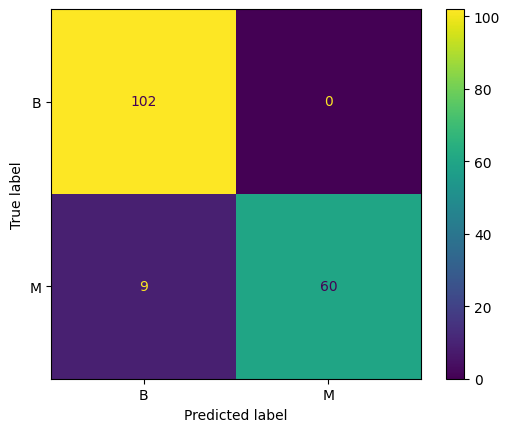

In [179]:
from sklearn.preprocessing import *

dataset = 'wdbc'
nf = 'data/lab4/%s.data'%dataset
x = loadtxt(nf, delimiter=',', dtype=str)
x = delete(x, 0, 1)
y = x[:, 0]
x = delete(x, 0, 1)

# transform string to number
y = LabelEncoder().fit_transform(y)
x = x.astype(float)
y = y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# normalize
x_train_mean = mean(x_train, 0)
x_train_std = std(x_train, 0)
x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_train_mean) / x_train_std

lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
predict = lda.predict(x_test)

acc = accuracy_score(y_test, predict)
kappa = cohen_kappa_score(y_test, predict)

print('kappa=%.2f%% acc=%.2f%%'%(100*kappa, 100*acc), '\n')

confuse_matrix = confusion_matrix(y_test, predict)
print(confuse_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=confuse_matrix, display_labels=['B', 'M'])
disp.plot()